In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
df_gdp = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/GDPALL47037.csv')

In [3]:
#read in data
df_gdp = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/GDPALL47037.csv')
df_rental = pd.read_csv('C:/Users/brand/Documents/DA8/Projects/capstone_nashville_da8/data/avg_monthly_rent.csv')

In [4]:
df_rental.head()

,Date,Avg Rent,per_change
0,1/1/2001,NaN,NaN
1,1/1/2002,NaN,#DIV/0!
2,1/1/2003,NaN,#DIV/0!
3,1/1/2004,NaN,#DIV/0!
4,1/1/2005,NaN,#DIV/0!


In [5]:
df_gdp.head()

,Date,GDP,per_change
0,1/1/2001,33111741.0,0.00
1,1/1/2002,34361553.0,0.04
2,1/1/2003,36125704.0,0.05
3,1/1/2004,38033907.0,0.05
4,1/1/2005,39817170.0,0.05


In [6]:
#convert date column 
df_gdp['Date'] = pd.to_datetime(df_gdp['Date'], format='%m/%d/%Y')
df_rental['Date'] = pd.to_datetime(df_rental['Date'], format='%m/%d/%Y')

In [7]:
#filter to 2015 to 2022
df_gdp = df_gdp[df_gdp['Date'].dt.year.between(2016, 2022)]
df_rental = df_rental[df_rental['Date'].dt.year.between(2016, 2022)]

In [8]:
#calculate change in GDP and rental price percentage change
df_gdp['GDP Change'] = df_gdp['GDP'].diff()
df_rental['Rental Price Change'] = df_rental['Avg Rent'].pct_change() * 100

In [9]:
#merge the data
df_merged = pd.merge(df_gdp, df_rental, on='Date')

In [10]:
#covert to numeric
df_merged['GDP Change'] = pd.to_numeric(df_merged['GDP Change'], errors='coerce')
df_merged['Rental Price Change'] = pd.to_numeric(df_merged['Rental Price Change'], errors='coerce')

In [11]:
df_merged

,Date,GDP,per_change_x,GDP Change,Avg Rent,per_change_y,Rental Price Change
0,2016-01-01,63608592.00,0.05,NaN,1251.66,0.04,NaN
1,2017-01-01,66939774.00,0.05,3331182.00,1311.57,0.05,4.786444
2,2018-01-01,70872833.00,0.06,3933059.00,1356.17,0.03,3.400505
3,2019-01-01,75617629.00,0.07,4744796.00,1406.72,0.04,3.727409
4,2020-01-01,73649304.00,-0.03,-1968325.00,1476.52,0.05,4.961897
5,2021-01-01,86106457.00,0.17,12457153.00,1504.67,0.02,1.906510
6,2022-01-01,95631502.27,0.11,9525045.27,1789.93,0.19,18.958310


In [12]:
df_merged['per_change_y'] = pd.to_numeric(df_merged['per_change_y'], errors='coerce')

In [13]:
#calculate the correlation
correlation = df_merged['GDP Change'].corr(df_merged['Rental Price Change'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.2517604783308422


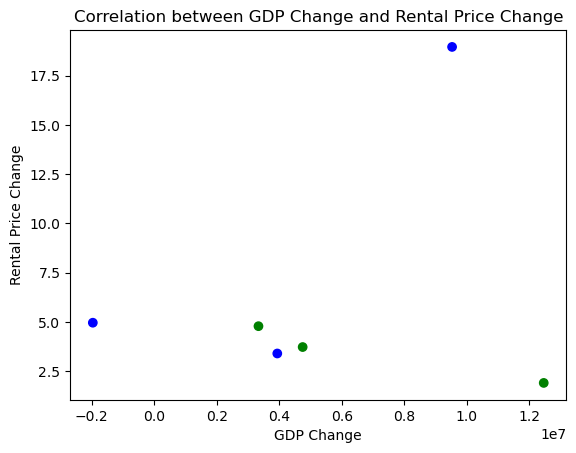

In [14]:
#visualize
plt.scatter(df_merged['GDP Change'], df_merged['Rental Price Change'], c=['blue' if x.year % 2 == 0 else 'green' for x in df_merged['Date']])
plt.xlabel('GDP Change')
plt.ylabel('Rental Price Change')
plt.title('Correlation between GDP Change and Rental Price Change')
plt.show()

In [15]:
df_merged['GDP Change'] = pd.to_numeric(df_merged['GDP Change'], errors='coerce')
df_merged['Rental Price Change'] = pd.to_numeric(df_merged['Rental Price Change'], errors='coerce')

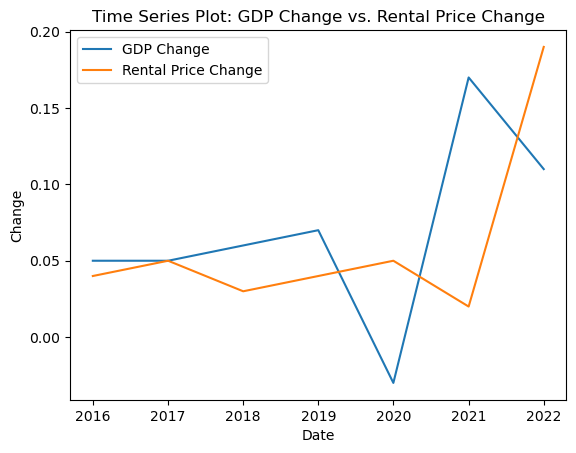

In [16]:
# Plot the time series for GDP change
plt.plot(df_merged['Date'], df_merged['per_change_x'], label='GDP Change')

# Plot the time series for Rental Price change
plt.plot(df_merged['Date'], df_merged['per_change_y'], label='Rental Price Change')

# Set the labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Time Series Plot: GDP Change vs. Rental Price Change')

# Display a legend
plt.legend()

# Show the plot
plt.show()

In [17]:
print(df_merged.dtypes)

Date                   datetime64[ns]
GDP                           float64
per_change_x                  float64
GDP Change                    float64
Avg Rent                      float64
per_change_y                  float64
Rental Price Change           float64
dtype: object


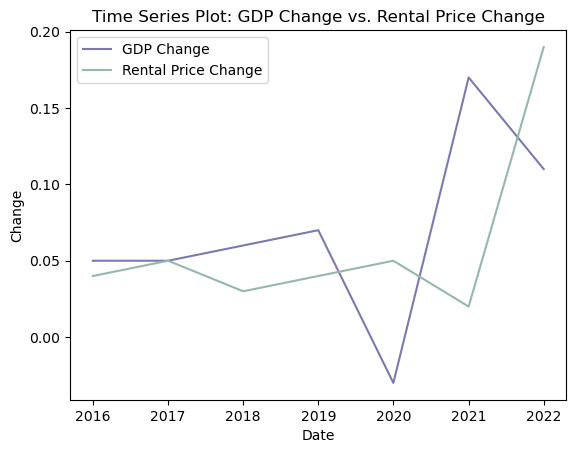

In [20]:
import matplotlib.pyplot as plt

# Plot the time series for GDP change with updated color
plt.plot(df_merged['Date'], df_merged['per_change_x'], label='GDP Change', color='#7b7aaf')

# Plot the time series for Rental Price change with updated color
plt.plot(df_merged['Date'], df_merged['per_change_y'], label='Rental Price Change', color='#94B8AB')

# Set the labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Time Series Plot: GDP Change vs. Rental Price Change')

# Display a legend
plt.legend()

# Show the plot
plt.show()

Correlation coefficient (excluding 2020): 0.129666418001466


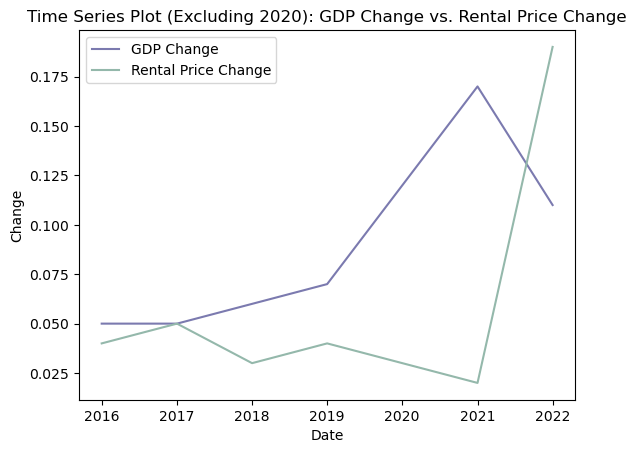

In [21]:
from scipy.stats import pearsonr

# Filter out the data for the year 2020
df_filtered = df_merged[df_merged['Date'].dt.year != 2020]

# Calculate the correlation coefficient
correlation, _ = pearsonr(df_filtered['per_change_x'], df_filtered['per_change_y'])
print('Correlation coefficient (excluding 2020):', correlation)

# Plot the time series for GDP change with updated color
plt.plot(df_filtered['Date'], df_filtered['per_change_x'], label='GDP Change', color='#7b7aaf')

# Plot the time series for Rental Price change with updated color
plt.plot(df_filtered['Date'], df_filtered['per_change_y'], label='Rental Price Change', color='#94B8AB')

# Set the labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Time Series Plot (Excluding 2020): GDP Change vs. Rental Price Change')

# Display a legend
plt.legend()

# Show the plot
plt.show()


Correlation coefficient (excluding 2020 and 2021): 0.9228479569508465


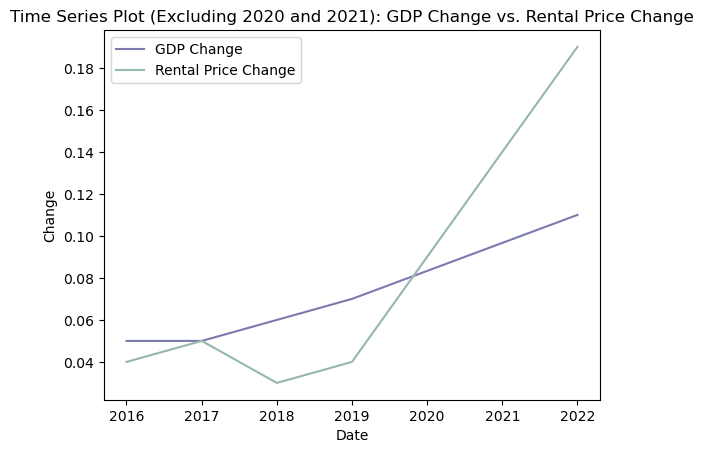

In [22]:
# Filter out the data for the years 2020 and 2021
df_filtered = df_merged[~df_merged['Date'].dt.year.isin([2020, 2021])]

# Calculate the correlation coefficient
correlation, _ = pearsonr(df_filtered['per_change_x'], df_filtered['per_change_y'])
print('Correlation coefficient (excluding 2020 and 2021):', correlation)

# Plot the time series for GDP change with updated color
plt.plot(df_filtered['Date'], df_filtered['per_change_x'], label='GDP Change', color='#7b7aaf')

# Plot the time series for Rental Price change with updated color
plt.plot(df_filtered['Date'], df_filtered['per_change_y'], label='Rental Price Change', color='#94B8AB')

# Set the labels and title for the plot
plt.xlabel('Date')
plt.ylabel('Change')
plt.title('Time Series Plot (Excluding 2020 and 2021): GDP Change vs. Rental Price Change')

# Display a legend
plt.legend()

# Show the plot
plt.show()